In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# import the regressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from scipy.stats import norm, skew 
from scipy.special import boxcox1p
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
os.chdir('E:')
#file = pd.read_excel('E:\\eval.xlsx')
file = pd.read_excel('E:\\file.xlsx')

In [3]:
file.shape

(191, 17)

In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 17 columns):
State                    191 non-null object
District                 191 non-null object
Population               191 non-null int64
calcu mmr                187 non-null float64
calcu IMR 12             191 non-null float64
pnc 48 per               191 non-null float64
pnc per live birth       191 non-null float64
per capita health exp    191 non-null int64
health per of gdp        191 non-null float64
phc per 100000           173 non-null float64
female pop per           191 non-null float64
literacy                 191 non-null float64
anc                      191 non-null float64
anc check                191 non-null float64
per home skill           182 non-null float64
percent insti            191 non-null float64
haemo                    191 non-null float64
dtypes: float64(13), int64(2), object(2)
memory usage: 25.5+ KB


In [5]:
file.describe()

,Population,calcu mmr,calcu IMR 12,pnc 48 per,pnc per live birth,per capita health exp,health per of gdp,phc per 100000,female pop per,literacy,anc,anc check,per home skill,percent insti,haemo
count,1.910000e+02,187.000000,191.000000,191.000000,191.000000,191.000000,191.000000,173.000000,191.000000,191.000000,191.000000,191.000000,182.000000,191.000000,191.000000
mean,1.976512e+06,116.236033,16.929357,11.717047,0.721601,1011.460733,0.867958,2.552293,49.012674,73.869810,4.379256,3.681869,35.189063,97.300245,4.219435
std,1.476784e+06,96.986826,10.985973,15.895449,0.445789,339.496527,0.223881,1.282288,1.504474,11.257024,3.253633,2.614501,27.564401,4.905358,3.254351
min,2.552300e+05,5.020080,1.055528,0.000000,0.004433,716.000000,0.600000,0.379577,45.563419,36.100000,1.853646,1.592045,0.174014,68.843872,0.192308
25%,1.127692e+06,55.742187,8.479796,0.486583,0.333550,716.000000,0.630000,1.746653,48.065434,67.900000,3.290362,2.864717,12.728659,97.128705,1.984848
50%,1.563715e+06,99.037917,15.195694,3.324870,0.756028,1011.000000,0.820000,2.218214,49.083503,74.360000,3.911125,3.431575,30.644731,99.413207,3.540654
75%,2.374760e+06,148.612299,22.905693,20.460703,1.025323,1119.000000,1.040000,3.033449,49.786590,81.275000,4.890115,3.999686,53.333333,99.879086,5.605371
max,1.106015e+07,639.836546,50.547538,81.630170,1.819892,3643.000000,1.340000,7.908883,53.183521,97.210000,45.246765,37.405446,100.000000,100.000000,22.737664


In [6]:
file.head(10)

,State,District,Population,calcu mmr,calcu IMR 12,pnc 48 per,pnc per live birth,per capita health exp,health per of gdp,phc per 100000,female pop per,literacy,anc,anc check,per home skill,percent insti,haemo
0,Andhra Pradesh,Anantapur,4081148,87.204323,14.513291,6.905952,0.719763,1013,0.82,1.960233,49.418311,63.57,3.993238,3.905973,69.418960,99.482275,3.599588
1,Andhra Pradesh,Chittoor,4174064,106.414208,11.522090,38.204631,0.916868,1013,0.82,2.252002,49.924887,71.53,3.567691,4.161339,53.571429,99.947186,9.872624
2,Andhra Pradesh,East Godavari,5154296,115.647356,16.755419,2.223678,1.355212,1013,0.82,2.308754,50.149551,70.99,3.299216,3.521318,78.048780,99.552218,2.973734
3,Andhra Pradesh,Guntur,4887813,133.824021,17.245050,6.171856,1.011953,1013,0.82,1.677642,50.074888,67.40,3.199218,3.997480,64.583333,99.929149,5.522138
4,Andhra Pradesh,Krishna,4517398,84.362760,10.756252,1.952910,0.191308,1013,0.82,1.793068,49.799197,73.74,3.333573,3.315837,77.777778,99.986234,2.328217
5,Andhra Pradesh,Kurnool,4053463,148.166830,19.498124,11.125496,0.974039,1013,0.82,2.047632,49.698189,59.97,4.357513,4.001891,58.528951,98.994619,8.374154
6,Andhra Pradesh,Nellore,2963557,43.552953,3.871374,0.844179,0.963053,1013,0.82,2.496999,49.622166,68.90,3.462101,3.280404,43.750000,99.765522,2.284289
7,Andhra Pradesh,Prakasam,3397448,38.599057,6.094588,0.290818,1.180562,1013,0.82,2.501878,49.520444,63.08,3.710463,4.129440,66.666667,99.981689,5.110050
8,Andhra Pradesh,Srikakulam,2703114,62.293484,10.752397,6.345035,1.205866,1013,0.82,2.811572,50.372208,61.74,3.458312,2.424101,38.095238,99.942950,0.743273
9,Andhra Pradesh,Vishakapatnam,4290589,244.482730,22.430060,6.982224,0.640610,1013,0.82,NaN,50.149551,66.91,3.299699,2.843969,62.204473,94.856964,3.276056


In [7]:
#handling missing data
all_data_na = (file.isnull().sum() / len(file)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
phc per 100000,9.424084
per home skill,4.712042
calcu mmr,2.094241


In [8]:
file["calcu mmr"] = file.groupby("State")["calcu mmr"].transform(
    lambda x: x.fillna(x.mean()))
file["phc per 100000"] = file.groupby("State")["phc per 100000"].transform(
    lambda x: x.fillna(x.mean()))
file["per home skill"] = file.groupby("State")["per home skill"].transform(
    lambda x: x.fillna(x.mean()))

In [9]:
#handling missing data
all_data_na = (file.isnull().sum() / len(file)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [10]:
cols = ['calcu mmr', 'calcu IMR 12', 'literacy', 'phc per 100000', 'percent insti', 'per home skill', 'per capita health exp', 'anc', 'anc check', 'pnc per live birth', 'haemo']
data = file.loc[:, cols]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 11 columns):
calcu mmr                191 non-null float64
calcu IMR 12             191 non-null float64
literacy                 191 non-null float64
phc per 100000           191 non-null float64
percent insti            191 non-null float64
per home skill           191 non-null float64
per capita health exp    191 non-null int64
anc                      191 non-null float64
anc check                191 non-null float64
pnc per live birth       191 non-null float64
haemo                    191 non-null float64
dtypes: float64(10), int64(1)
memory usage: 16.5 KB


In [11]:
data.head()

,calcu mmr,calcu IMR 12,literacy,phc per 100000,percent insti,per home skill,per capita health exp,anc,anc check,pnc per live birth,haemo
0,87.204323,14.513291,63.57,1.960233,99.482275,69.418960,1013,3.993238,3.905973,0.719763,3.599588
1,106.414208,11.522090,71.53,2.252002,99.947186,53.571429,1013,3.567691,4.161339,0.916868,9.872624
2,115.647356,16.755419,70.99,2.308754,99.552218,78.048780,1013,3.299216,3.521318,1.355212,2.973734
3,133.824021,17.245050,67.40,1.677642,99.929149,64.583333,1013,3.199218,3.997480,1.011953,5.522138
4,84.362760,10.756252,73.74,1.793068,99.986234,77.777778,1013,3.333573,3.315837,0.191308,2.328217


In [12]:
numeric_feats = data.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
anc check,11.332658
anc,10.485773
per capita health exp,4.922015
calcu mmr,2.797309
haemo,1.794508
phc per 100000,1.336422
calcu IMR 12,0.947322
per home skill,0.682056
pnc per live birth,0.131436
literacy,-0.454455


In [13]:
#box-cox transformation 
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0
for feat in skewed_features:
    #data[feat] += 1
    data[feat] = boxcox1p(data[feat], lam)
    
#data[skewed_features] = np.log1p(data[skewed_features])

There are 11 skewed numerical features to Box Cox transform


In [14]:
data.describe()

,calcu mmr,calcu IMR 12,literacy,phc per 100000,percent insti,per home skill,per capita health exp,anc,anc check,pnc per live birth,haemo
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,4.476621,2.679011,4.303420,1.217615,4.586634,3.146472,6.884695,1.622686,1.496911,0.508389,1.476084
std,0.802962,0.689933,0.161916,0.329786,0.054521,1.099575,0.247782,0.293171,0.251351,0.268401,0.606466
min,1.795101,0.720533,3.613617,0.321777,4.246262,0.160429,6.575076,1.048597,0.952447,0.004423,0.175891
25%,4.038518,2.249120,4.232656,1.004658,4.586280,2.684448,6.575076,1.456369,1.351884,0.287844,1.093431
50%,4.610115,2.784745,4.322277,1.179271,4.609294,3.433987,6.919684,1.591503,1.488755,0.563055,1.513071
75%,5.006536,3.174116,4.410064,1.435571,4.613923,3.984476,7.021084,1.773258,1.609375,0.705729,1.887837
max,6.462774,3.942504,4.587108,2.187049,4.615121,4.615121,8.200837,3.833992,3.648199,1.036699,3.167063


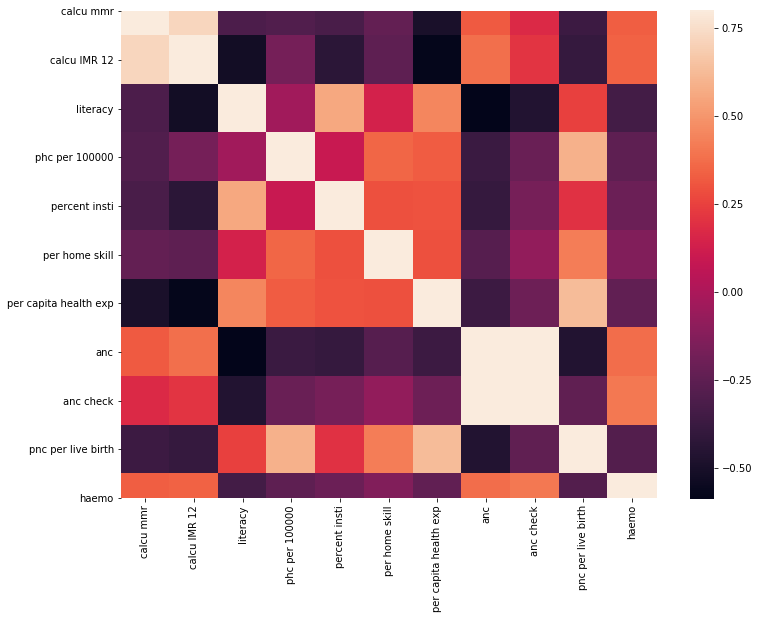

In [15]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

E:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


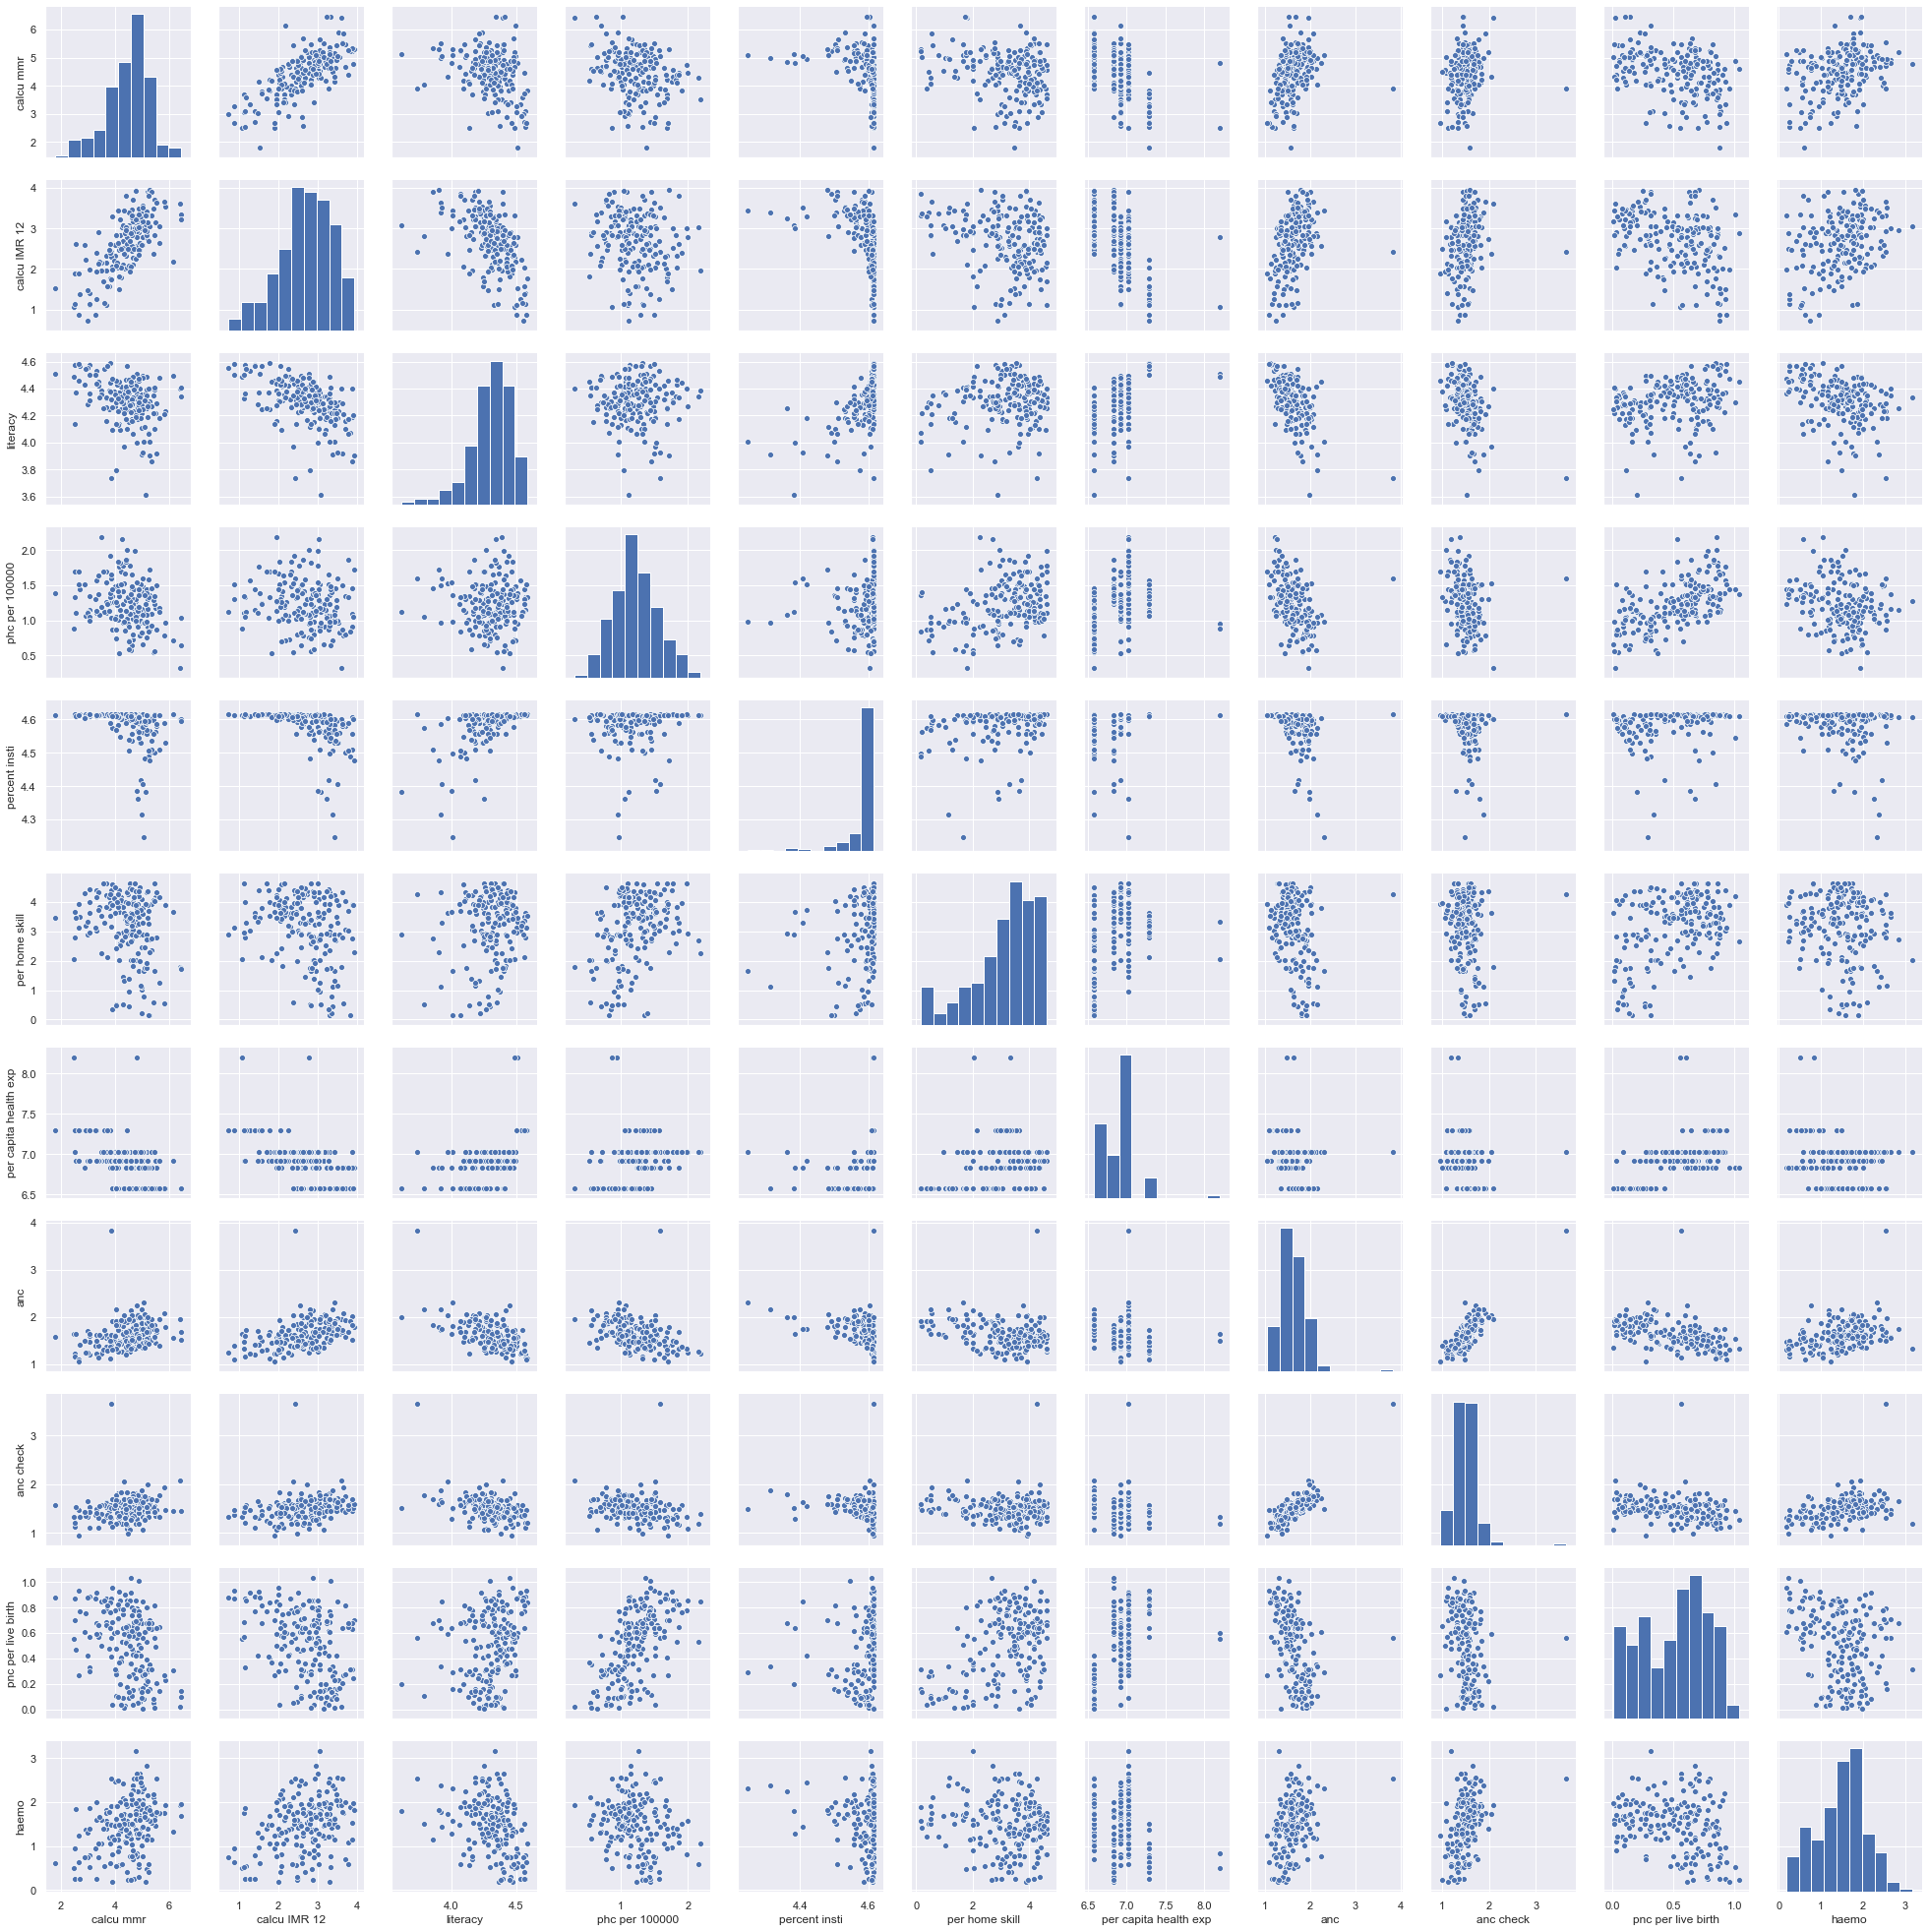

In [16]:
sns.set()
sns.pairplot(data[cols], size=2.5)
plt.show()

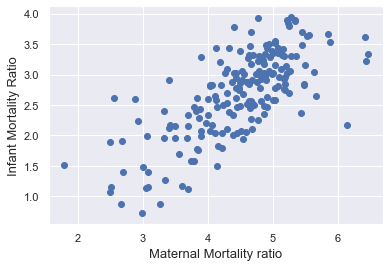

In [17]:
fig, ax = plt.subplots()
ax.scatter(data['calcu mmr'], data['calcu IMR 12'])
plt.ylabel('Infant Mortality Ratio', fontsize=13)
plt.xlabel('Maternal Mortality ratio', fontsize=13)
plt.show()

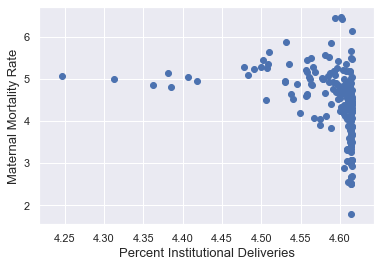

In [34]:
fig, ax = plt.subplots()
ax.scatter(data['percent insti'], data['calcu mmr'])
plt.ylabel('Maternal Mortality Rate', fontsize=13)
plt.xlabel('Percent Institutional Deliveries', fontsize=13)
plt.show()

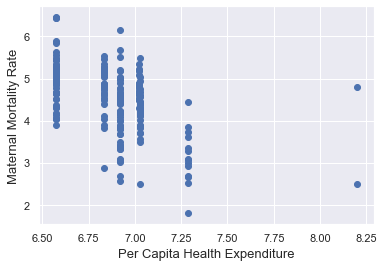

In [35]:
fig, ax = plt.subplots()
ax.scatter(data['per capita health exp'], data['calcu mmr'])
plt.ylabel('Maternal Mortality Rate', fontsize=13)
plt.xlabel('Per Capita Health Expenditure', fontsize=13)
plt.show()

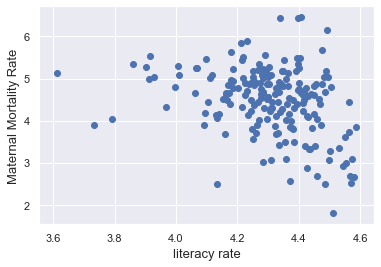

In [18]:
fig, ax = plt.subplots()
ax.scatter(data['literacy'], data['calcu mmr'])
plt.ylabel('Maternal Mortality Rate', fontsize=13)
plt.xlabel('literacy rate', fontsize=13)
plt.show()

[Text(1395.0, 475.65000000000003, 'percent insti <= 4.608\nmse = 0.641\nsamples = 191\nvalue = 4.477'),
 Text(697.5, 339.75, 'per home skill <= 4.191\nmse = 0.295\nsamples = 91\nvalue = 4.921'),
 Text(348.75, 203.85000000000002, 'per home skill <= 0.524\nmse = 0.235\nsamples = 83\nvalue = 4.976'),
 Text(174.375, 67.94999999999999, 'mse = 0.306\nsamples = 7\nvalue = 4.578'),
 Text(523.125, 67.94999999999999, 'mse = 0.212\nsamples = 76\nvalue = 5.013'),
 Text(1046.25, 203.85000000000002, 'per home skill <= 4.317\nmse = 0.561\nsamples = 8\nvalue = 4.349'),
 Text(871.875, 67.94999999999999, 'mse = 0.257\nsamples = 4\nvalue = 3.737'),
 Text(1220.625, 67.94999999999999, 'mse = 0.117\nsamples = 4\nvalue = 4.96'),
 Text(2092.5, 339.75, 'per capita health exp <= 7.157\nmse = 0.613\nsamples = 100\nvalue = 4.072'),
 Text(1743.75, 203.85000000000002, 'literacy <= 4.475\nmse = 0.456\nsamples = 84\nvalue = 4.237'),
 Text(1569.375, 67.94999999999999, 'mse = 0.387\nsamples = 79\nvalue = 4.168'),
 Text

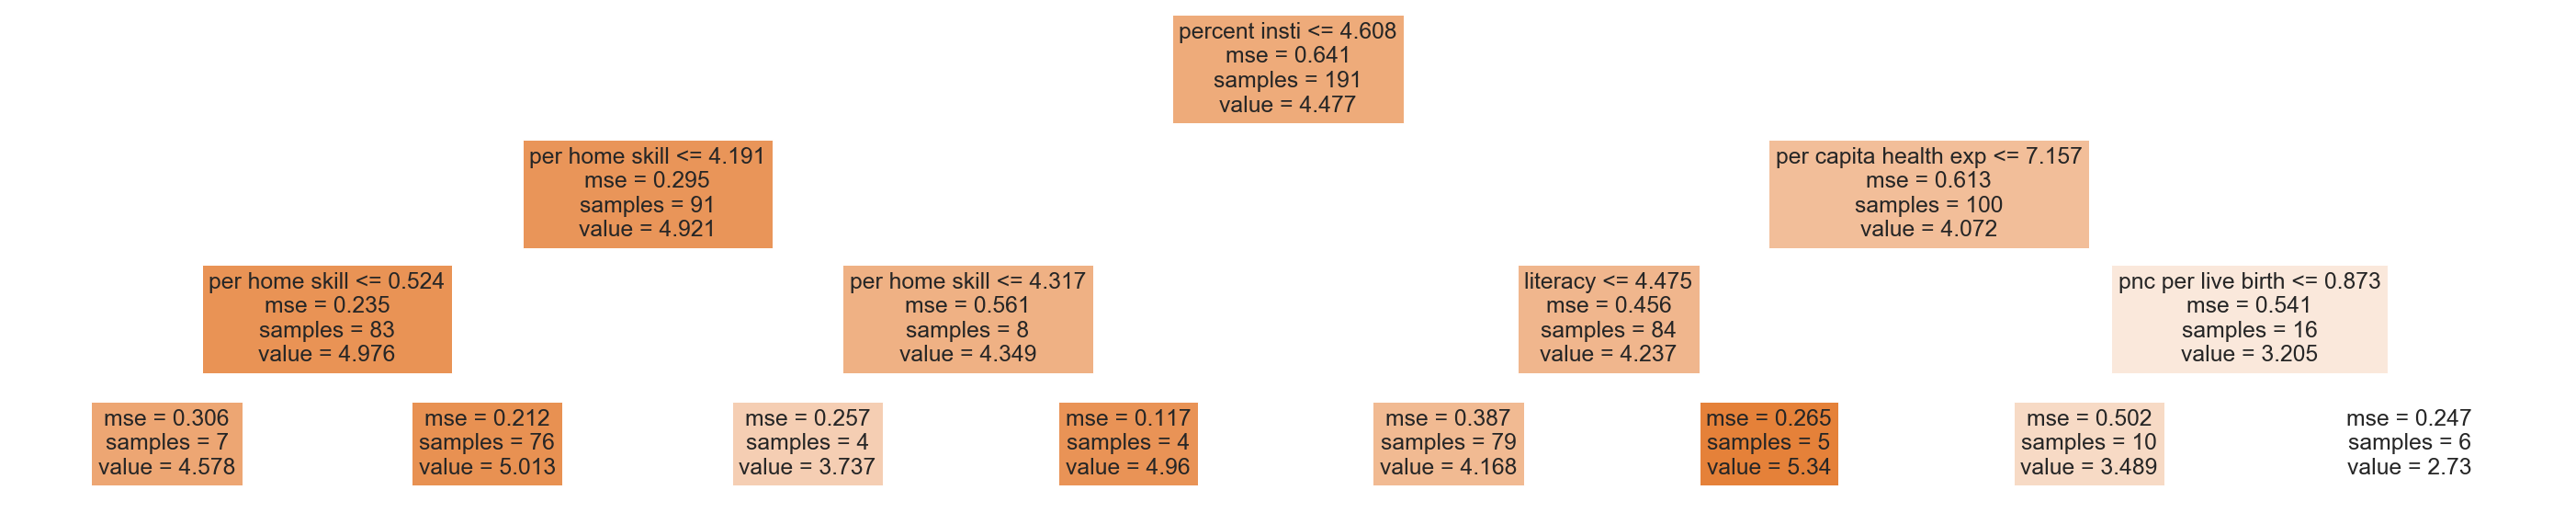

In [19]:
feature_cols = ['literacy', 'percent insti', 'per home skill', 'pnc per live birth', 'per capita health exp']
x = data[feature_cols]
y = data['calcu mmr']
  
# create a regressor object 
reg = DecisionTreeRegressor(random_state = 0, max_depth = 3)  
  
# fit the regressor with X and Y data 
model = reg.fit(x, y) 

fig = plt.figure(figsize=(50,10))
tree.plot_tree(reg, feature_names = feature_cols,  class_names = 'calcu mmr', filled=True)

[Text(1395.0, 475.65000000000003, 'percent insti <= 4.608\nmse = 0.641\nsamples = 191\nvalue = 4.477'),
 Text(697.5, 339.75, 'per home skill <= 4.191\nmse = 0.295\nsamples = 91\nvalue = 4.921'),
 Text(348.75, 203.85000000000002, 'per home skill <= 0.524\nmse = 0.235\nsamples = 83\nvalue = 4.976'),
 Text(174.375, 67.94999999999999, 'mse = 0.306\nsamples = 7\nvalue = 4.578'),
 Text(523.125, 67.94999999999999, 'mse = 0.212\nsamples = 76\nvalue = 5.013'),
 Text(1046.25, 203.85000000000002, 'per home skill <= 4.317\nmse = 0.561\nsamples = 8\nvalue = 4.349'),
 Text(871.875, 67.94999999999999, 'mse = 0.257\nsamples = 4\nvalue = 3.737'),
 Text(1220.625, 67.94999999999999, 'mse = 0.117\nsamples = 4\nvalue = 4.96'),
 Text(2092.5, 339.75, 'percent insti <= 4.613\nmse = 0.613\nsamples = 100\nvalue = 4.072'),
 Text(1743.75, 203.85000000000002, 'percent insti <= 4.613\nmse = 0.399\nsamples = 39\nvalue = 4.337'),
 Text(1569.375, 67.94999999999999, 'mse = 0.35\nsamples = 31\nvalue = 4.197'),
 Text(191

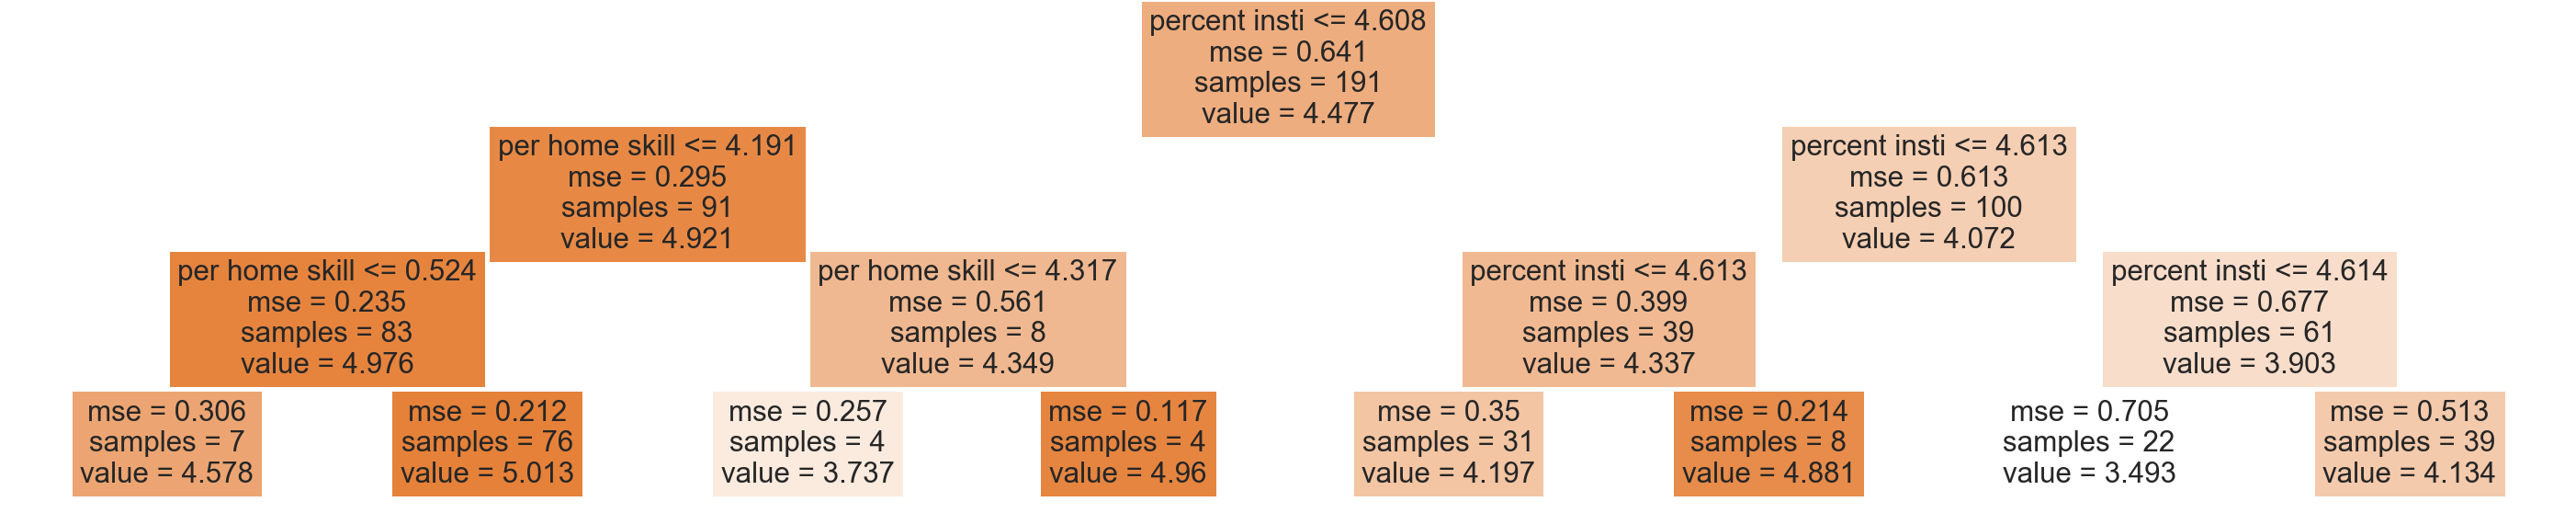

In [20]:
feature_cols = ['percent insti', 'per home skill']
x = data[feature_cols]
y = data['calcu mmr']
  
# create a regressor object 
reg = DecisionTreeRegressor(random_state = 0, max_depth = 3)  
  
# fit the regressor with X and Y data 
model = reg.fit(x, y) 

fig = plt.figure(figsize=(50,10))
tree.plot_tree(reg, feature_names = feature_cols,  class_names = 'calcu mmr', filled=True)

[Text(1395.0, 475.65000000000003, 'per capita health exp <= 7.157\nmse = 0.641\nsamples = 191\nvalue = 4.477'),
 Text(697.5, 339.75, 'per capita health exp <= 6.876\nmse = 0.489\nsamples = 175\nvalue = 4.593'),
 Text(348.75, 203.85000000000002, 'pnc per live birth <= 0.449\nmse = 0.353\nsamples = 79\nvalue = 4.904'),
 Text(174.375, 67.94999999999999, 'mse = 0.343\nsamples = 51\nvalue = 5.0'),
 Text(523.125, 67.94999999999999, 'mse = 0.325\nsamples = 28\nvalue = 4.73'),
 Text(1046.25, 203.85000000000002, 'per capita health exp <= 6.921\nmse = 0.455\nsamples = 96\nvalue = 4.337'),
 Text(871.875, 67.94999999999999, 'mse = 0.708\nsamples = 33\nvalue = 4.115'),
 Text(1220.625, 67.94999999999999, 'mse = 0.284\nsamples = 63\nvalue = 4.453'),
 Text(2092.5, 339.75, 'pnc per live birth <= 0.873\nmse = 0.541\nsamples = 16\nvalue = 3.205'),
 Text(1743.75, 203.85000000000002, 'pnc per live birth <= 0.584\nmse = 0.502\nsamples = 10\nvalue = 3.489'),
 Text(1569.375, 67.94999999999999, 'mse = 0.077\ns

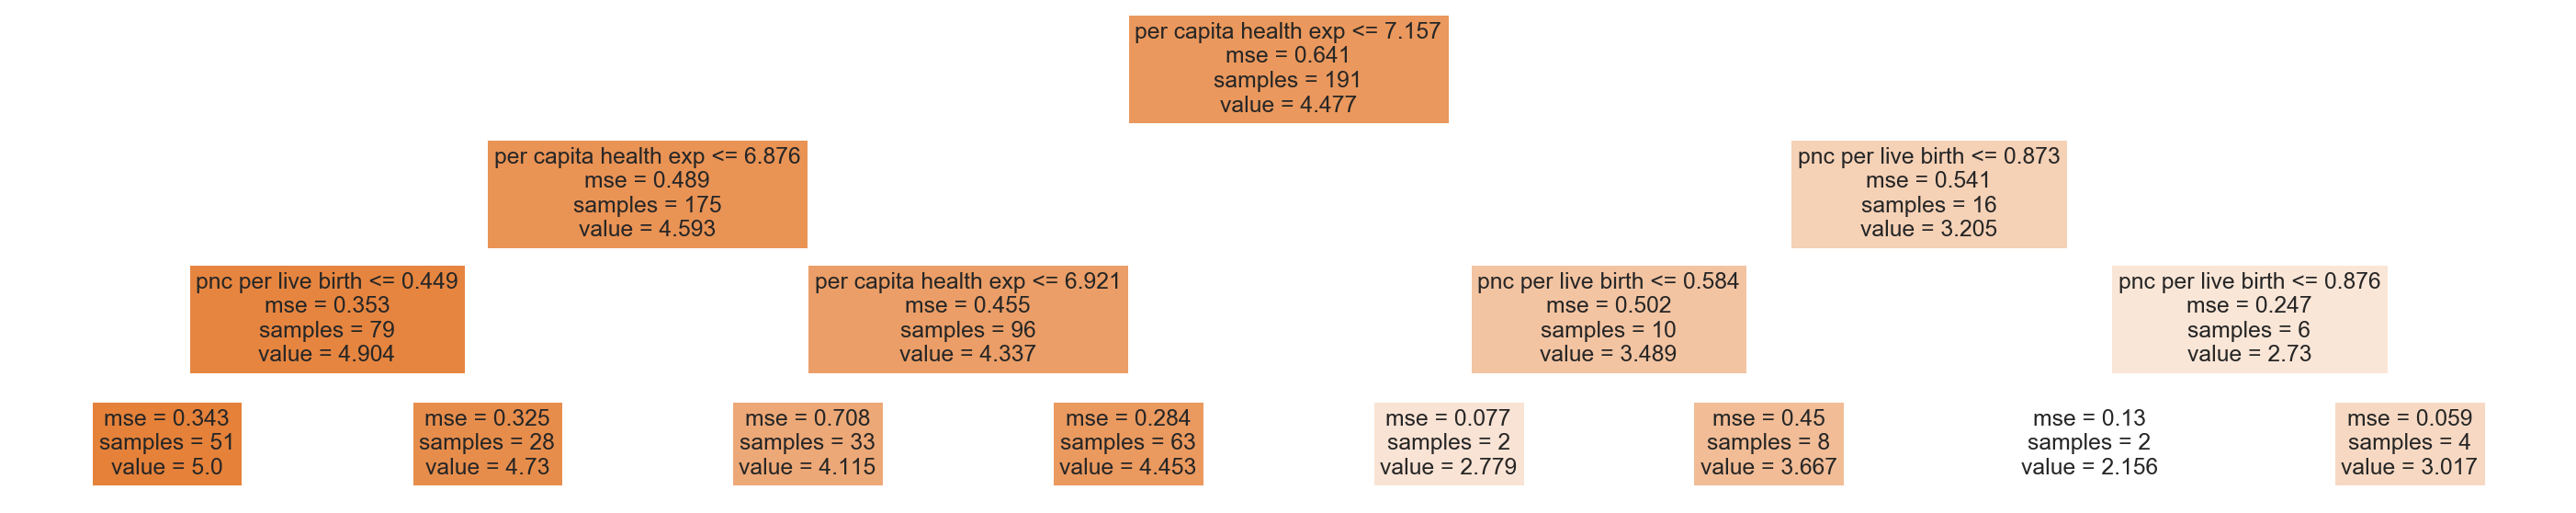

In [21]:
feature_cols = ['pnc per live birth', 'per capita health exp']
x = data[feature_cols]
y = data['calcu mmr']
  
# create a regressor object 
reg = DecisionTreeRegressor(random_state = 0, max_depth = 3)  
  
# fit the regressor with X and Y data 
model = reg.fit(x, y) 

fig = plt.figure(figsize=(50,10))
tree.plot_tree(reg, feature_names = feature_cols,  class_names = 'calcu mmr', filled=True)

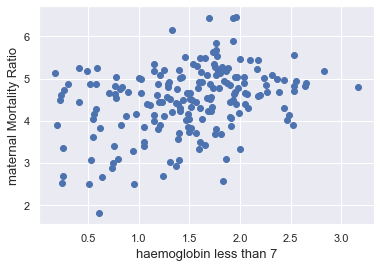

In [24]:
fig, ax = plt.subplots()
ax.scatter(data['haemo'], data['calcu mmr'])
plt.ylabel('Maternal Mortality Ratio', fontsize=13)
plt.xlabel('Percent women with haemoglobin less than 7', fontsize=13)
plt.show()

In [25]:

haemo =  data['haemo'].values.reshape(-1, 1)
mmr = data['calcu mmr'].values.reshape(-1, 1)
regressor = LinearRegression()  
regressor.fit(haemo, mmr)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[3.83009803]
[[0.43799844]]


[Text(1395.0, 475.65000000000003, 'literacy <= 4.45\nmse = 0.366\nsamples = 191\nvalue = 1.476'),
 Text(697.5, 339.75, 'phc per 100000 <= 1.323\nmse = 0.297\nsamples = 159\nvalue = 1.596'),
 Text(348.75, 203.85000000000002, 'per capita health exp <= 6.971\nmse = 0.216\nsamples = 104\nvalue = 1.718'),
 Text(174.375, 67.94999999999999, 'mse = 0.168\nsamples = 83\nvalue = 1.641'),
 Text(523.125, 67.94999999999999, 'mse = 0.289\nsamples = 21\nvalue = 2.022'),
 Text(1046.25, 203.85000000000002, 'literacy <= 4.324\nmse = 0.37\nsamples = 55\nvalue = 1.366'),
 Text(871.875, 67.94999999999999, 'mse = 0.292\nsamples = 35\nvalue = 1.552'),
 Text(1220.625, 67.94999999999999, 'mse = 0.341\nsamples = 20\nvalue = 1.041'),
 Text(2092.5, 339.75, 'phc per 100000 <= 1.241\nmse = 0.278\nsamples = 32\nvalue = 0.878'),
 Text(1743.75, 203.85000000000002, 'per capita health exp <= 7.157\nmse = 0.258\nsamples = 14\nvalue = 1.229'),
 Text(1569.375, 67.94999999999999, 'mse = 0.169\nsamples = 7\nvalue = 1.56'),
 

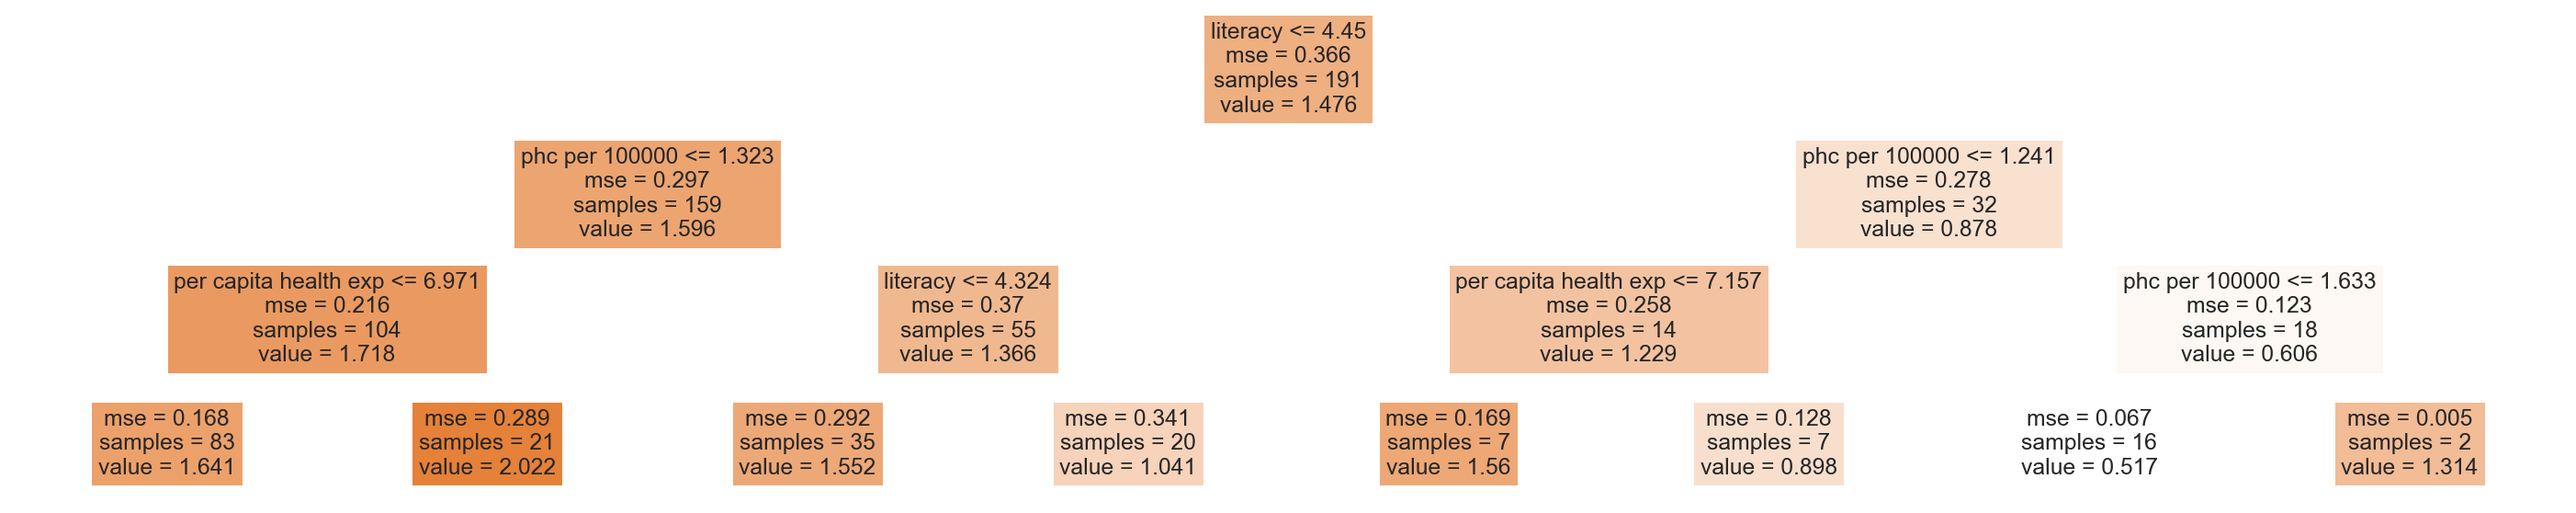

In [27]:
feature_cols = ['literacy', 'per capita health exp', 'phc per 100000']
x = data[feature_cols]
y = data['haemo']
  
# create a regressor object 
reg = DecisionTreeRegressor(random_state = 0, max_depth = 3)  
  
# fit the regressor with X and Y data 
model = reg.fit(x, y) 

fig = plt.figure(figsize=(50,10))
tree.plot_tree(reg, feature_names = feature_cols,  class_names = 'haemo', filled=True)

[Text(1395.0, 475.65000000000003, 'calcu mmr <= 3.897\nmse = 0.474\nsamples = 191\nvalue = 2.679'),
 Text(697.5, 339.75, 'pnc per live birth <= 0.871\nmse = 0.302\nsamples = 42\nvalue = 1.817'),
 Text(348.75, 203.85000000000002, 'calcu mmr <= 2.503\nmse = 0.238\nsamples = 33\nvalue = 1.946'),
 Text(174.375, 67.94999999999999, 'mse = 0.0\nsamples = 1\nvalue = 1.066'),
 Text(523.125, 67.94999999999999, 'mse = 0.221\nsamples = 32\nvalue = 1.973'),
 Text(1046.25, 203.85000000000002, 'calcu mmr <= 3.601\nmse = 0.249\nsamples = 9\nvalue = 1.342'),
 Text(871.875, 67.94999999999999, 'mse = 0.077\nsamples = 7\nvalue = 1.113'),
 Text(1220.625, 67.94999999999999, 'mse = 0.022\nsamples = 2\nvalue = 2.144'),
 Text(2092.5, 339.75, 'calcu mmr <= 4.774\nmse = 0.253\nsamples = 149\nvalue = 2.922'),
 Text(1743.75, 203.85000000000002, 'pnc per live birth <= 0.307\nmse = 0.229\nsamples = 73\nvalue = 2.681'),
 Text(1569.375, 67.94999999999999, 'mse = 0.154\nsamples = 19\nvalue = 3.025'),
 Text(1918.125, 67

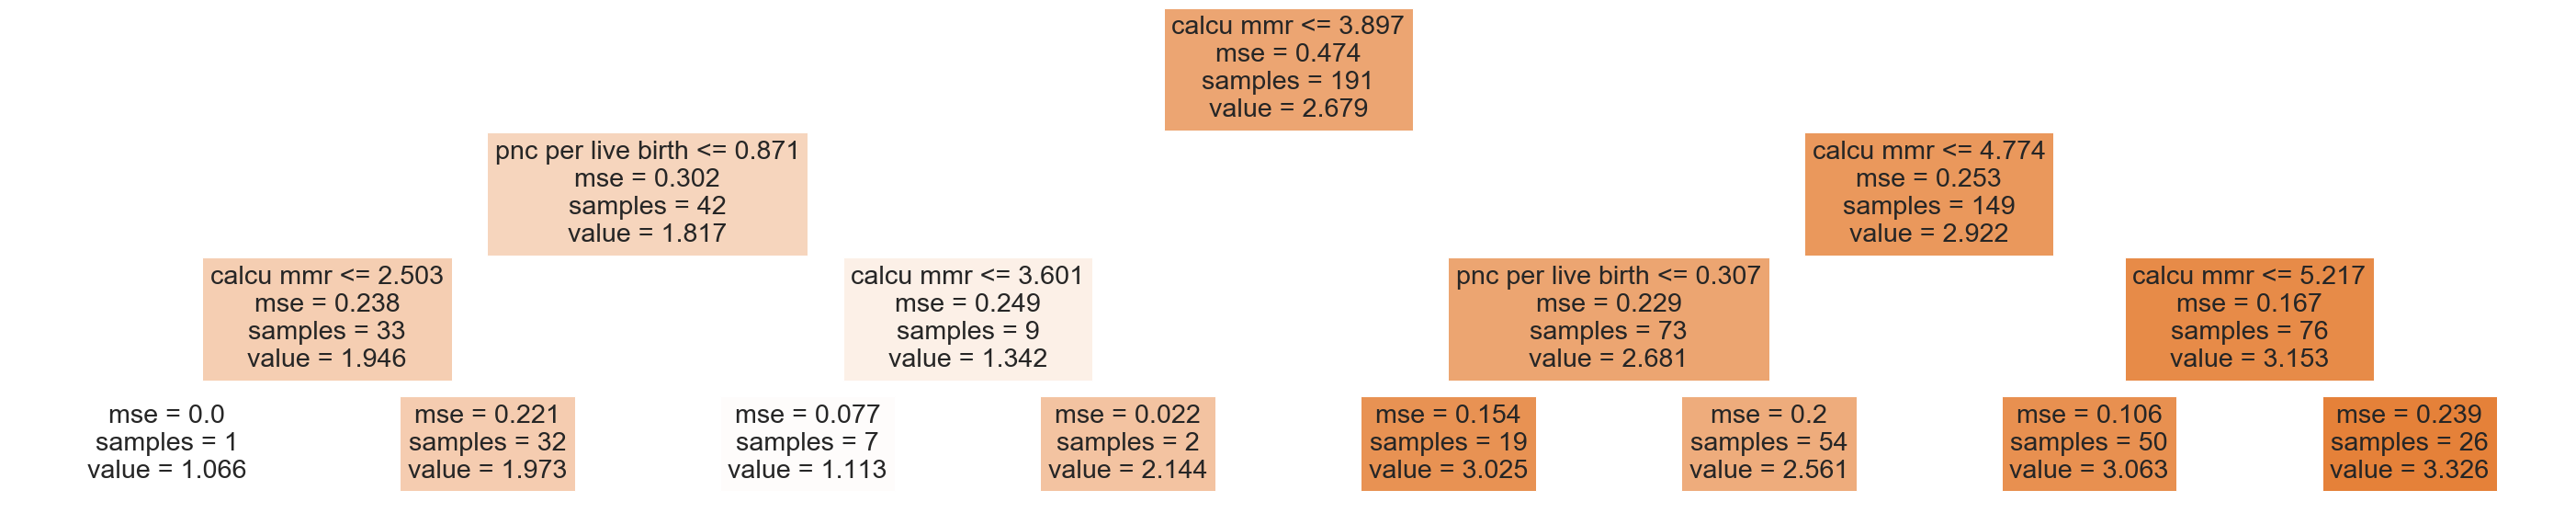

In [28]:
feature_cols = ['calcu mmr', 'pnc per live birth']
x = data[feature_cols]
y = data['calcu IMR 12']
  
# create a regressor object 
reg = DecisionTreeRegressor(random_state = 0, max_depth = 3)  
  
# fit the regressor with X and Y data 
model = reg.fit(x, y) 

fig = plt.figure(figsize=(50,10))
tree.plot_tree(reg, feature_names = feature_cols,  class_names = 'calcu IMR 12', filled=True)

In [29]:
imr =  data['calcu IMR 12'].values.reshape(-1, 1)
mmr = data['calcu mmr'].values.reshape(-1, 1)
regressor = LinearRegression()  
regressor.fit(mmr, imr)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-0.0906748]
[[0.61870019]]


In [32]:
#x = daata["RM"] ## X usually means our input variables (or independent variables)
#y = target["MEDV"] ## Y usually means our output/dependent variable
imr =  data['calcu IMR 12'].values.reshape(-1, 1)
mmr = data['calcu mmr'].values.reshape(-1, 1)
mmr = sm.add_constant(mmr) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(imr, mmr).fit() ## sm.OLS(output, input)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     203.5
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           8.13e-32
Time:                        20:43:21   Log-Likelihood:                -129.83
No. Observations:                 191   AIC:                             263.7
Df Residuals:                     189   BIC:                             270.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0907      0.197     -0.460      0.646      -0.480       0.298
x1             0.6187      0.043     14.266      0.000       0.533       0.704
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.601
Skew:                          -0.134   Prob(JB):                        0.740
Kurtosis:                       2.937   Cond. No.                         27.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#x = daata["RM"] ## X usually means our input variables (or independent variables)
#y = target["MEDV"] ## Y usually means our output/dependent variable
yy =  data['calcu mmr'].values.reshape(-1, 1)
xx = data['haemo'].values.reshape(-1, 1)
xx = sm.add_constant(xx) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(yy, xx).fit() ## sm.OLS(output, input)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     23.23
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           2.95e-06
Time:                        00:15:04   Log-Likelihood:                -217.53
No. Observations:                 191   AIC:                             439.1
Df Residuals:                     189   BIC:                             445.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8301      0.145     26.418      0.000       3.544       4.116
x1             0.4380      0.091      4.819      0.000       0.259       0.617
==============================================================================
Omnibus:                        3.886   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.573
Skew:                          -0.329   Prob(JB):                        0.168
Kurtosis:                       3.122   Cond. No.                         5.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""